# Refugee Mini Analysis

The data is from the following source: https://en.wikipedia.org/wiki/List_of_countries_by_refugee_population 

DISCLAIMER: These tables have been chosen because I find them to be a good fit for a data cleaning task. I do not intent to display any political opinion on the matter.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [82]:
rpc = pd.read_csv("refugees_per_country.csv", encoding = "utf-8")

In [83]:
rpc.head(10)

,country name,number of refugees per 1000 people,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Afghanistan,7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
1,Albania,0.05,138,154,104,96,86,82,76,70,65,77
2,Algeria,2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
3,Angola,0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
4,Argentina,0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"
5,Armenia,5.22,"17,886","3,240","3,190","3,132","2,854","2,918","3,296","3,607","3,953","4,566"
6,Aruba,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,1.51,"42,188","35,582","35,582","34,503","30,083","23,434","21,805","22,548","20,919","22,164"
8,Austria,7.13,"93,250","60,747","60,747","55,598","51,730","47,073","42,630","38,906","37,557","30,773"
9,Azerbaijan,0.14,"1,193","1,357","1,299","1,380","1,468","1,730","1,891","1,642","2,061","2,352"


In [84]:
rpc.rename(columns = {"number of refugees per 1000 people": "Refugees per 1000"}, inplace = True)

In [85]:
rpc.head(5)

,country name,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Afghanistan,7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
1,Albania,0.05,138,154,104,96,86,82,76,70,65,77
2,Algeria,2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
3,Angola,0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
4,Argentina,0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"


In [86]:
no_per_1000 = rpc[["country name", "Refugees per 1000"]]
print(no_per_1000)

    country name  Refugees per 1000
0    Afghanistan               7.14
1        Albania               0.05
2        Algeria               2.42
3         Angola               0.64
4      Argentina               0.08
..           ...                ...
177    Venezuela               5.68
178      Vietnam                NaN
179        Yemen              10.05
180       Zambia               1.64
181     Zimbabwe               0.40

[182 rows x 2 columns]


In [87]:
no_per_1000[no_per_1000["Refugees per 1000"].isnull()]

,country name,Refugees per 1000
6,Aruba,NaN
13,Barbados,NaN
16,Belize,NaN
22,British Virgin Islands,NaN
34,Colombia,NaN
62,Grenada,NaN
67,Haiti,NaN
68,Honduras,NaN
95,Macau,NaN
97,Madagascar,NaN


In [88]:
rpc.iloc[178]

country name         Vietnam
Refugees per 1000        NaN
2016                     NaN
2015                     NaN
2014                     NaN
2013                     NaN
2012                     NaN
2011                     990
2010                   1,928
2009                   2,357
2008                   2,357
2007                   2,357
Name: 178, dtype: object

Vietnam had a large flow of refugees from 2007 to 2011, data is missing from then until 2016. The population of Vietnam in 2016 was 93 million people. Below is a calculation of the expected number of refugees per 1000 people in Vietnam. I will make the assumption that the trend of a declining rate of refugees is continuing with the average between 2012 and 2016 being 300 per year.

In [89]:
refugees_known = (2357*3) + 1928 + 990
refugees_unknown = 300*5
print("Predicted number of refugees living in Vietnam :")
print(refugees_known + refugees_unknown)
print(" ")

print("Number of refugees per 1000 people :")
print(93000000 / 93000)
print(":")
print(11489 / 93000)

Predicted number of refugees living in Vietnam :
11489
 
Number of refugees per 1000 people :
1000.0
:
0.12353763440860215


We can see they could have around 11,483 refugees provided that the trend is continuing, this means per 1000 people, Vietnam should have 0.12 refugees. This is not a definite answer to replace our null values with as it is an assumption, lets calculate only the known values and assume that the NaN values are 0 and see how the ratio changes.

In [90]:
print("Number of refugees to Vietnam that are known")
print(refugees_known)
print(" ")

print(93000000 / 93000)
print(":")
print(9989 / 93000)

Number of refugees to Vietnam that are known
9989
 
1000.0
:
0.10740860215053763


The number decreases to 0.11 refugees per 1000 people, its clear to see since Vietnam has such a large population, the missing data isnt effecting the ratio too much as the number of refugees going into the country isn't nearly as big as their total population.

In [91]:
total_fields = rpc.count()
print(total_fields)

country name         182
Refugees per 1000    160
2016                 168
2015                 169
2014                 170
2013                 169
2012                 167
2011                 169
2010                 163
2009                 161
2008                 156
2007                 156
dtype: int64


In [92]:
rpc.dropna(inplace = True)

In [93]:
rpc.head(50)

,country name,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Afghanistan,7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
1,Albania,0.05,138,154,104,96,86,82,76,70,65,77
2,Algeria,2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
3,Angola,0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
4,Argentina,0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"
5,Armenia,5.22,"17,886","3,240","3,190","3,132","2,854","2,918","3,296","3,607","3,953","4,566"
7,Australia,1.51,"42,188","35,582","35,582","34,503","30,083","23,434","21,805","22,548","20,919","22,164"
8,Austria,7.13,"93,250","60,747","60,747","55,598","51,730","47,073","42,630","38,906","37,557","30,773"
9,Azerbaijan,0.14,"1,193","1,357","1,299","1,380","1,468","1,730","1,891","1,642","2,061","2,352"
11,Bahrain,0.20,271,277,311,294,289,199,165,139,48,271


Here we have the first 50 countries and territories with a complete and accurate set of data. Now for a better representation we want to compare this to other datasets, such as the total population of the country and also a different dataset which tells us how many people flee from a given country. 

The dataset I am about to import now shows the percentage of a countries population which flee and 
the number of people who fled within a given year, data from this table only shows us data from years 2014 to 2006.

In [94]:
rbo = pd.read_csv("refugees_by_origin.csv", encoding = "utf8")

In [95]:
rbo.head(10)

,country name,percentage of population,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,Afghanistan,7.59,"2,596,270","2,556,502","2,586,152","2,664,436","3,054,709","1,905,804","1,817,913","1,909,911","2,107,519"
1,Albania,0.35,"10,158","10,103","12,568","13,551","14,772","15,711","15,006","15,340","14,080"
2,Algeria,0.01,"3,524","3,660","5,673","6,120","6,688","8,184","9,060","10,615","8,353"
3,Andorra,0.01,7,5,7,6,6,6,6,9,10
4,Angola,0.04,"9,484","10,286","19,258","128,664","134,858","141,021","171,393","186,155","206,501"
5,Antigua and Barbuda,0.06,53,49,45,32,30,28,26,25,19
6,Argentina,0.00,318,388,447,518,557,608,"1,047","1,171",894
7,Armenia,0.39,"11,848","11,998","15,934","16,486","17,546","18,000","16,336","15,436","14,918"
8,Australia,0.00,25,28,48,39,37,28,43,63,29
9,Austria,0.00,10,10,12,11,10,12,14,23,34


In [96]:
rbo.rename(columns = {"country name": "Country Name", 
                     "percentage of population": "Percentage of Population (%)", 
                     "2014": "Fleeing in (2014)", 
                     "2013": "Fleeing in (2013)", 
                     "2012": "Fleeing in (2012)", 
                     "2011": "Fleeing in (2011)", 
                     "2010": "Fleeing in (2010)", 
                     "2009": "Fleeing in (2009)", 
                     "2008": "Fleeing in (2008)", 
                     "2007": "Fleeing in (2007)", 
                     "2006": "Fleeing in (2006)"}, inplace = True)

In [97]:
rbo.set_index("Country Name", inplace = True)

In [98]:
total_fields = rbo.count()
print(total_fields)

Percentage of Population (%)    204
Fleeing in (2014)               202
Fleeing in (2013)               201
Fleeing in (2012)               198
Fleeing in (2011)               197
Fleeing in (2010)               194
Fleeing in (2009)               191
Fleeing in (2008)               193
Fleeing in (2007)               194
Fleeing in (2006)               193
dtype: int64


In [99]:
null_data = rbo[rbo.isnull().any(axis=1)]
print(null_data) # Values are either small island or city nations or provinces of another country. 
# Therefore I will drop these rows

                  Percentage of Population (%) Fleeing in (2014)  \
Country Name                                                       
Cayman Islands                            0.01                 6   
Cook Islands                              0.00                 1   
Curaçao                                   0.02                35   
French Polynesia                          0.00               NaN   
Gibraltar                                 0.01                 2   
Luxembourg                                0.00                 2   
Marshall Islands                          0.01                 3   
Monaco                                    0.01                 3   
Nauru                                     0.00               NaN   
Niue                                      1.11                18   
Norfolk Island                            0.05                 1   
Palau                                     0.00                 1   
Samoa                                     0.00  

In [100]:
rbo.dropna(inplace = True)

In [101]:
rbo.count()

Percentage of Population (%)    188
Fleeing in (2014)               188
Fleeing in (2013)               188
Fleeing in (2012)               188
Fleeing in (2011)               188
Fleeing in (2010)               188
Fleeing in (2009)               188
Fleeing in (2008)               188
Fleeing in (2007)               188
Fleeing in (2006)               188
dtype: int64

In [102]:
rbo.dtypes

Percentage of Population (%)    float64
Fleeing in (2014)                object
Fleeing in (2013)                object
Fleeing in (2012)                object
Fleeing in (2011)                object
Fleeing in (2010)                object
Fleeing in (2009)                object
Fleeing in (2008)                object
Fleeing in (2007)                object
Fleeing in (2006)                object
dtype: object

In [103]:
rbo["Fleeing in (2014)"] = rbo["Fleeing in (2014)"].str.replace(",","").astype(int)
rbo["Fleeing in (2013)"] = rbo["Fleeing in (2013)"].str.replace(",","").astype(int)
rbo["Fleeing in (2012)"] = rbo["Fleeing in (2012)"].str.replace(",","").astype(int)
rbo["Fleeing in (2011)"] = rbo["Fleeing in (2011)"].str.replace(",","").astype(int)
rbo["Fleeing in (2010)"] = rbo["Fleeing in (2010)"].str.replace(",","").astype(int)
rbo["Fleeing in (2009)"] = rbo["Fleeing in (2009)"].str.replace(",","").astype(int)
rbo["Fleeing in (2008)"] = rbo["Fleeing in (2008)"].str.replace(",","").astype(int)
rbo["Fleeing in (2007)"] = rbo["Fleeing in (2007)"].str.replace(",","").astype(int)
rbo["Fleeing in (2006)"] = rbo["Fleeing in (2006)"].str.replace(",","").astype(int)

In [104]:
rbo.dtypes

Percentage of Population (%)    float64
Fleeing in (2014)                 int32
Fleeing in (2013)                 int32
Fleeing in (2012)                 int32
Fleeing in (2011)                 int32
Fleeing in (2010)                 int32
Fleeing in (2009)                 int32
Fleeing in (2008)                 int32
Fleeing in (2007)                 int32
Fleeing in (2006)                 int32
dtype: object

In [105]:
rbo.head()

,Percentage of Population (%),Fleeing in (2014),Fleeing in (2013),Fleeing in (2012),Fleeing in (2011),Fleeing in (2010),Fleeing in (2009),Fleeing in (2008),Fleeing in (2007),Fleeing in (2006)
Country Name,,,,,,,,,,
Afghanistan,7.59,2596270,2556502,2586152,2664436,3054709,1905804,1817913,1909911,2107519
Albania,0.35,10158,10103,12568,13551,14772,15711,15006,15340,14080
Algeria,0.01,3524,3660,5673,6120,6688,8184,9060,10615,8353
Andorra,0.01,7,5,7,6,6,6,6,9,10
Angola,0.04,9484,10286,19258,128664,134858,141021,171393,186155,206501


Before we start our analysis, it would be helpful to have some addition information regarding each countries population statistics. I copied data from https://www.worldometers.info/world-population/population-by-country/ for the most reliable information.

In [106]:
wp = pd.read_csv("world_population.csv", encoding = "utf8")

In [107]:
wp.head(5)

,selection1_name,selection1_selection2,selection1_selection3,selection1_selection4,selection1_selection5,selection1_selection6,selection1_selection7,selection1_selection8,selection1_selection9,selection1_selection10,selection1_selection11
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [108]:
wp.rename(columns = {"selection1_name": "Country Name", 
                     "selection1_selection2": "Population",
                     "selection1_selection3": "Yearly Change (%)", 
                     "selection1_selection4": "Net Change", 
                     "selection1_selection5": "Density (P/Km²)", 
                     "selection1_selection6": "Land Area (Km²)", 
                     "selection1_selection7": "Net Migrants", 
                     "selection1_selection8": "Fertility Rate", 
                     "selection1_selection9": "Median Age", 
                     "selection1_selection10": "Urban Population (%)", 
                     "selection1_selection11": "World Share"}, inplace = True)

In [109]:
wp.head(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Fertility Rate,Median Age,Urban Population (%),World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [110]:
missing_wp_data = wp[wp.isnull().any(axis=1)]
print(missing_wp_data)

                 Country Name Population Yearly Change (%) Net Change  \
201               Isle of Man     85,033            0.53 %        449   
202                   Andorra     77,265            0.16 %        123   
203                  Dominica     71,986            0.25 %        178   
204            Cayman Islands     65,722            1.19 %        774   
205                   Bermuda     62,278           -0.36 %       -228   
206          Marshall Islands     59,190            0.68 %        399   
207  Northern Mariana Islands     57,559            0.60 %        343   
208                 Greenland     56,770            0.17 %         98   
209            American Samoa     55,191           -0.22 %       -121   
210       Saint Kitts & Nevis     53,199            0.71 %        376   
211            Faeroe Islands     48,863            0.38 %        185   
212              Sint Maarten     42,876            1.15 %        488   
213                    Monaco     39,242           

As we can see from the data here, some columns are irrelevant to the topic of this project, but some countries/regions are missing data from the migration rate column which is relevant. Therefore what we are going to do, is drop the columns that are unnecessary and remove the rows which are missing the information we need.

In [111]:
wp.drop(columns = ["Fertility Rate", "Median Age", "World Share", "Urban Population (%)"], inplace = True)

In [112]:
wp[wp.isnull().any(axis=1)]

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants
201,Isle of Man,"85,033",0.53 %,449,149,570,NaN
202,Andorra,"77,265",0.16 %,123,164,470,NaN
203,Dominica,"71,986",0.25 %,178,96,750,NaN
204,Cayman Islands,"65,722",1.19 %,774,274,240,NaN
205,Bermuda,"62,278",-0.36 %,-228,"1,246",50,NaN
206,Marshall Islands,"59,190",0.68 %,399,329,180,NaN
207,Northern Mariana Islands,"57,559",0.60 %,343,125,460,NaN
208,Greenland,"56,770",0.17 %,98,0,"410,450",NaN
209,American Samoa,"55,191",-0.22 %,-121,276,200,NaN
210,Saint Kitts & Nevis,"53,199",0.71 %,376,205,260,NaN


In [113]:
wp.dropna(inplace = True)

In [114]:
wp.head(5)    # NET migration is negative when more people are emigrating than immigrating.

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399"
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687"
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806"
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955"
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379"


In [115]:
wp.iloc[20]

Country Name         United Kingdom
Population               67,886,011
Yearly Change (%)            0.53 %
Net Change                  355,839
Density (P/Km²)                 281
Land Area (Km²)             241,930
Net Migrants                260,650
Name: 20, dtype: object

In [116]:
wp.shape

(201, 7)

In [117]:
rpc.shape

(141, 12)

In [118]:
rpc.rename(columns = {"country name": "Country Name"}, inplace = True)

In [119]:
wp["Country Name"].replace({"Czech Republic (Czechia)": "Czech Republic"}, inplace = True)
wp["Country Name"].replace({"Côte d'Ivoire": "Ivory Coast"}, inplace = True)
rpc["Country Name"].replace({"Swaziland": "Eswatini"}, inplace = True)
wp["Country Name"].replace({"Congo": "Republic of Congo"}, inplace = True)
wp["Country Name"].replace({"DR Congo": "Democratic Republic of Congo"}, inplace = True)
rpc["Country Name"].replace({"Macedonia": "North Macedonia"}, inplace = True)

In [120]:
mergedpop = pd.merge(wp, rpc, on = "Country Name", how = "outer")
print(mergedpop)

            Country Name     Population Yearly Change (%)  Net Change  \
0                  China  1,439,323,776            0.39 %   5,540,090   
1                  India  1,380,004,385            0.99 %  13,586,631   
2          United States    331,002,651            0.59 %   1,937,734   
3              Indonesia    273,523,615            1.07 %   2,898,047   
4               Pakistan    220,892,340            2.00 %   4,327,022   
..                   ...            ...               ...         ...   
197                Tonga        105,695            1.15 %       1,201   
198  U.S. Virgin Islands        104,425           -0.15 %        -153   
199           Seychelles         98,347            0.62 %         608   
200  Antigua and Barbuda         97,929            0.84 %         811   
201        Liechtenstein            NaN               NaN         NaN   

    Density (P/Km²) Land Area (Km²) Net Migrants  Refugees per 1000  \
0               153       9,388,211     -348,399    

In [121]:
mergedpop.tail(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
197,Tonga,"105,695",1.15 %,"1,201",147,720,-800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,U.S. Virgin Islands,"104,425",-0.15 %,-153,298,350,-451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,Seychelles,"98,347",0.62 %,608,214,460,-200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Antigua and Barbuda,"97,929",0.84 %,811,223,440,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,2.89,163,107,103,97,102,94,92,91,89,283


In [122]:
mergedpop.dropna(inplace = True)

In [123]:
mergedpop.tail(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
159,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,16.88,"17,683","14,787","20,530","20,015","19,139","20,340","15,104","12,111","9,228","6,651"
167,Montenegro,"628,066",0.01 %,79,47,"13,450",-480,9.92,974,"6,203","6,462","8,476","11,198","12,874","16,364","24,019","24,741","8,528"
168,Luxembourg,"625,978",1.66 %,"10,249",242,"2,590","9,741",2.14,"2,046","1,192","1,108",920,"2,910","2,855","3,254","3,230","3,109","2,737"
173,Malta,"441,543",0.27 %,"1,171","1,380",320,900,14.58,"7,948","6,095","6,095","9,906","8,248","6,952","6,136","5,955","4,331","3,000"
179,Iceland,"341,243",0.65 %,"2,212",3,"100,250",380,0.32,252,104,99,79,60,58,83,62,49,49


In [124]:
mergedpop.set_index("Country Name", inplace = True)

In [125]:
mergedpop.sort_index(ascending = True)

,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,"38,928,346",2.33 %,"886,592",60,"652,860","-62,920",7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
Albania,"2,877,797",-0.11 %,"-3,120",105,"27,400","-14,000",0.05,138,154,104,96,86,82,76,70,65,77
Algeria,"43,851,044",1.85 %,"797,990",18,"2,381,740","-10,000",2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
Angola,"32,866,272",3.27 %,"1,040,977",26,"1,246,700","6,413",0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
Argentina,"45,195,774",0.93 %,"415,097",17,"2,736,690","4,800",0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,"3,473,730",0.35 %,"11,996",20,"175,020","-3,000",0.08,312,289,272,203,181,174,189,168,145,140
Venezuela,"28,435,940",-0.28 %,"-79,889",32,"882,050","-653,249",5.68,"7,861","5,647","5,052","4,340","3,644","2,022","1,547","1,313","1,161",907
Yemen,"29,825,964",2.28 %,"664,042",56,"527,970","-30,000",10.05,"269,783","263,047","257,645","241,288","237,182","214,740","190,092","170,854","140,169","117,363"


In [126]:
mergedpop.rename(columns = {"2016": "Refugees in (2016)", 
                     "2015": "Refugees in (2015)",
                     "2014": "Refugees in (2014)", 
                     "2013": "Refugees in (2013)", 
                     "2012": "Refugees in (2012)", 
                     "2011": "Refugees in (2011)", 
                     "2010": "Refugees in (2010)", 
                     "2009": "Refugees in (2009)", 
                     "2008": "Refugees in (2008)", 
                     "2007": "Refugees in (2007)"}, inplace = True)

In [127]:
mergedpop.head()

,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,Refugees in (2016),Refugees in (2015),Refugees in (2014),Refugees in (2013),Refugees in (2012),Refugees in (2011),Refugees in (2010),Refugees in (2009),Refugees in (2008),Refugees in (2007)
Country Name,,,,,,,,,,,,,,,,,
China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",0.22,"317,255","301,057","301,052","301,047","301,037","301,018","300,986","300,989","300,967","301,078"
India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",0.15,"197,851","200,383","199,937","188,395","185,656","185,118","184,821","185,323","184,543","161,537"
United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",0.84,"272,959","267,222","267,222","263,662","262,023","264,763","264,574","275,461","279,548","281,219"
Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",0.02,"7,827","5,277","4,270","3,206","1,819","1,006",811,798,369,315
Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",8.33,"1,352,560","1,540,854","1,505,525","1,616,507","1,638,456","1,702,700","1,900,621","759,392","765,720","887,273"


In [128]:
mergedpop.loc["United Kingdom"]

Population            67,886,011
Yearly Change (%)         0.53 %
Net Change               355,839
Density (P/Km²)              281
Land Area (Km²)          241,930
Net Migrants             260,650
Refugees per 1000           1.82
Refugees in (2016)       118,995
Refugees in (2015)       117,234
Refugees in (2014)       117,234
Refugees in (2013)       126,055
Refugees in (2012)       149,799
Refugees in (2011)       193,510
Refugees in (2010)       238,150
Refugees in (2009)       269,363
Refugees in (2008)       292,097
Refugees in (2007)       299,718
Name: United Kingdom, dtype: object

In [129]:
mergedpop.dtypes

Population             object
Yearly Change (%)      object
Net Change             object
Density (P/Km²)        object
Land Area (Km²)        object
Net Migrants           object
Refugees per 1000     float64
Refugees in (2016)     object
Refugees in (2015)     object
Refugees in (2014)     object
Refugees in (2013)     object
Refugees in (2012)     object
Refugees in (2011)     object
Refugees in (2010)     object
Refugees in (2009)     object
Refugees in (2008)     object
Refugees in (2007)     object
dtype: object

In [130]:
mergedpop["Population"] = mergedpop["Population"].str.replace(",", "").astype(int)
mergedpop["Yearly Change (%)"] = mergedpop["Yearly Change (%)"].str.replace("%", "").astype(float)
mergedpop["Net Change"] = mergedpop["Net Change"].str.replace(",","").astype(int)
mergedpop["Density (P/Km²)"] = mergedpop["Density (P/Km²)"].str.replace(",","").astype(int)
mergedpop["Land Area (Km²)"] = mergedpop["Land Area (Km²)"].str.replace(",","").astype(int)
mergedpop["Net Migrants"] = mergedpop["Net Migrants"].str.replace(",","").astype(int)
mergedpop["Refugees in (2016)"] = mergedpop["Refugees in (2016)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2015)"] = mergedpop["Refugees in (2015)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2014)"] = mergedpop["Refugees in (2014)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2013)"] = mergedpop["Refugees in (2013)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2012)"] = mergedpop["Refugees in (2012)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2011)"] = mergedpop["Refugees in (2011)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2010)"] = mergedpop["Refugees in (2010)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2009)"] = mergedpop["Refugees in (2009)"].str.replace(",","").astype(int)
mergedpop["Refugees in (2008)"] = mergedpop["Refugees in (2008)"].str.replace(",","").astype(int)

In [131]:
mergedpop.dtypes

Population              int32
Yearly Change (%)     float64
Net Change              int32
Density (P/Km²)         int32
Land Area (Km²)         int32
Net Migrants            int32
Refugees per 1000     float64
Refugees in (2016)      int32
Refugees in (2015)      int32
Refugees in (2014)      int32
Refugees in (2013)      int32
Refugees in (2012)      int32
Refugees in (2011)      int32
Refugees in (2010)      int32
Refugees in (2009)      int32
Refugees in (2008)      int32
Refugees in (2007)     object
dtype: object

##### Analysis

In [132]:
mergedpop["Refugees in (2016)"].sort_values(ascending = False).head(10)

Country Name
Turkey                          2869421
Pakistan                        1352560
Lebanon                         1012969
Iran                             979435
Bangladesh                       950000
Uganda                           940835
Ethiopia                         791631
Jordan                           685197
Germany                          669482
Democratic Republic of Congo     451956
Name: Refugees in (2016), dtype: int32

Turkey takes in the most number of refugees, notice how Lebanon are third given that they're a very small country. 

In [133]:
mergedpop["Refugees in (2014)"].sort_values(ascending = False).head(10)

Country Name
Turkey      1587374
Pakistan    1505525
Lebanon     1154040
Iran         982027
Ethiopia     659524
Jordan       654141
Kenya        551352
Chad         452897
Uganda       385513
China        301052
Name: Refugees in (2014), dtype: int32

In [134]:
rbo["Fleeing in (2014)"].sort_values(ascending = False).head(10)

Country Name
Syria                           3869626
Afghanistan                     2596270
Somalia                         1106434
Sudan                            659408
Democratic Republic of Congo     516563
Central African Republic         410787
Iraq                             369954
Eritrea                          330541
Pakistan                         315805
Vietnam                          313417
Name: Fleeing in (2014), dtype: int32

We can immediately see at the top of each list, that Syria had the most people fleeing from the country. Turkey, who largely borders Syria, has the most incoming refugees. We can see here why Turkey has in 2016, had the largest number of refugees cosidering how close they to Syria, Afghanistan and Iraq.

If we look at this data, we can see that Afghanistan has 2.5 million people that escaped in 2014. Afghanistan has non-mountainous land borders with Tajikistan, Uzbekistan, Turkmenistan, Iran and Pakistan. Let's see how many refugees each of these countries took in 2014.

In [135]:
afghan_sum = (rbo["Fleeing in (2014)"].loc["Uzbekistan"] + 
rbo["Fleeing in (2014)"].loc["Turkmenistan"] + 
rbo["Fleeing in (2014)"].loc["Tajikistan"] + 
rbo["Fleeing in (2014)"].loc["Pakistan"] + 
rbo["Fleeing in (2014)"].loc["Iran"])

print(afghan_sum)

404000


In [136]:
Sum = (404000 / 2596270) * 100 
print(Sum) 

15.560785280421527


That is a total of a possible 15.5% of all Afghans escaping the country that could be going to its neighbouring countries, yet the number would be much lower as refugees may be fleeing from other countries.

Before I start showing some visualisations, lets get a glimpse of which countries have the highest percentage of citizens escaping from the country and which countries have the most refugees per 1000 people.

In [137]:
mergedpop["Refugees per 1000"].sort_values(ascending = False).head(10)

Country Name
Lebanon              208.91
Jordan                89.55
Chad                  30.97
Turkey                23.72
Mauritania            19.36
Djibouti              16.88
Sweden                14.66
Malta                 14.58
Republic of Congo     13.65
Cameroon              13.27
Name: Refugees per 1000, dtype: float64

In [138]:
rbo["Percentage of Population (%)"].sort_values(ascending = False).head(10)

Country Name
Syria                               17.09
Somalia                              9.52
Central African Republic             7.88
Afghanistan                          7.59
Eritrea                              6.08
Bhutan                               3.00
Palestinians                         2.10
Sudan                                1.65
Saint Vincent and the Grenadines     1.56
Iraq                                 1.04
Name: Percentage of Population (%), dtype: float64

Comparing these two tables, we can see a direct correlation between the country in which almost 1 in 5 people leave and its surrounding neighbours. 1 in 5 people in Lebanon are also refugees, lets pull the data for Lebanon and get a better idea of the situation there.

In [139]:
mergedpop.loc["Lebanon"]

Population            6825445
Yearly Change (%)       -0.44
Net Change             -30268
Density (P/Km²)           667
Land Area (Km²)         10230
Net Migrants           -30012
Refugees per 1000      208.91
Refugees in (2016)    1012969
Refugees in (2015)    1172388
Refugees in (2014)    1154040
Refugees in (2013)     856546
Refugees in (2012)     133538
Refugees in (2011)       8845
Refugees in (2010)       7949
Refugees in (2009)      50300
Refugees in (2008)      50319
Refugees in (2007)     50,266
Name: Lebanon, dtype: object

In [140]:
mergedpop["Population"].loc["Lebanon"]

6825445

In [141]:
ukdens = mergedpop["Density (P/Km²)"].loc["United Kingdom"]
lebdens = mergedpop["Density (P/Km²)"].loc["Lebanon"]
compareukleb = ukdens, lebdens

In [142]:
res = compareukleb[1] - compareukleb[0]
res / compareukleb[0] * 100                    # Lebanon is 137% more dense than the UK
# Despite having a population of 6.8 million people, Lebanon house over 1 million refugees

137.36654804270464

In [143]:
top10rp1000 = mergedpop["Refugees per 1000"].sort_values(ascending = False).head(10)
print(top10rp1000)

Country Name
Lebanon              208.91
Jordan                89.55
Chad                  30.97
Turkey                23.72
Mauritania            19.36
Djibouti              16.88
Sweden                14.66
Malta                 14.58
Republic of Congo     13.65
Cameroon              13.27
Name: Refugees per 1000, dtype: float64


Text(0.5, 1.0, 'Number of refugees per 1000 residents per country')

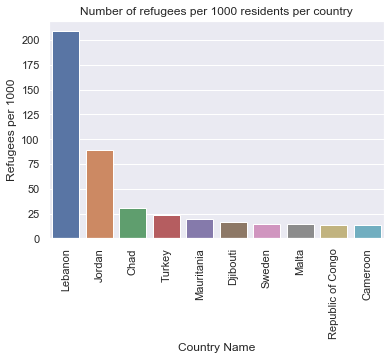

In [144]:
sns.barplot(x = top10rp1000.index, y = top10rp1000)
plt.xticks(rotation = 90)
plt.title("Number of refugees per 1000 residents per country")

##### Comparing western Europe with eastern Europe

In [145]:
mergedpop.loc["Netherlands"]

Population            17134872
Yearly Change (%)         0.22
Net Change               37742
Density (P/Km²)            508
Land Area (Km²)          33720
Net Migrants             16000
Refugees per 1000         4.89
Refugees in (2016)      101744
Refugees in (2015)       82494
Refugees in (2014)       82494
Refugees in (2013)       74707
Refugees in (2012)       71909
Refugees in (2011)       74598
Refugees in (2010)       74961
Refugees in (2009)       76008
Refugees in (2008)       77600
Refugees in (2007)      86,587
Name: Netherlands, dtype: object

In [146]:
western_europe = mergedpop.loc[["United Kingdom", "France", "Spain", "Portugal", "Belgium", 
                                "Netherlands", "Germany", "Italy", "Norway", "Sweden", "Switzerland", 
                               "Iceland", "Austria", "Czech Republic"]]
print(western_europe)

                Population  Yearly Change (%)  Net Change  Density (P/Km²)  \
Country Name                                                                 
United Kingdom    67886011               0.53      355839              281   
France            65273511               0.22      143783              119   
Spain             46754778               0.04       18002               94   
Portugal          10196709              -0.29      -29478              111   
Belgium           11589623               0.44       50295              383   
Netherlands       17134872               0.22       37742              508   
Germany           83783942               0.32      266897              240   
Italy             60461826              -0.15      -88249              206   
Norway             5421241               0.79       42384               15   
Sweden            10099265               0.63       62886               25   
Switzerland        8654622               0.74       63257       

Text(0.5, 1.0, 'Refugees per 1000 people per each Western European nation')

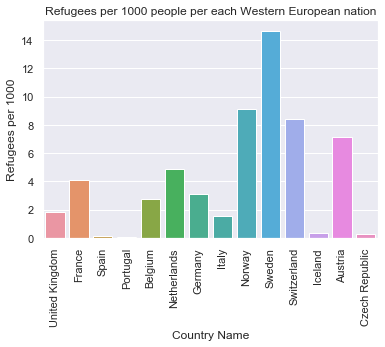

In [147]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees per 1000"])
plt.xticks(rotation = 90)
plt.title("Refugees per 1000 people per each Western European nation")

Text(0.5, 1.0, 'Number of refugees in each country in 2016')

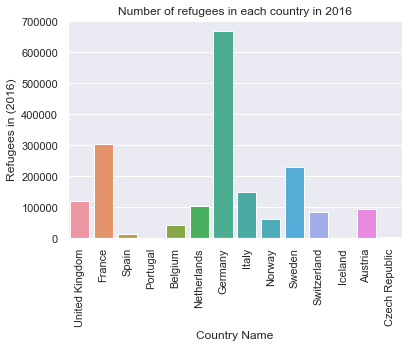

In [148]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees in (2016)"])
plt.xticks(rotation = 90)
plt.title("Number of refugees in each country in 2016")

Text(0.5, 1.0, 'Number of refugees in each country in 2008')

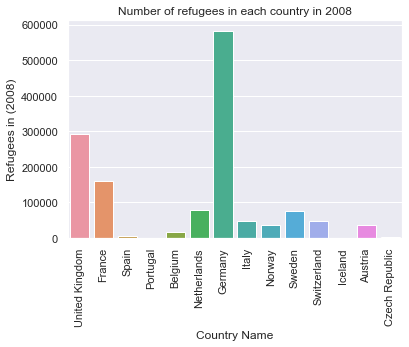

In [149]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees in (2008)"])
plt.xticks(rotation = 90)
plt.title("Number of refugees in each country in 2008")

The two graphs above look similar, however we can see some nations are having a declining number of refugees over the space of 8 years, whilst some other countries have a rising number of refugees.

Text(0.5, 1.0, 'Population per Western European nation')

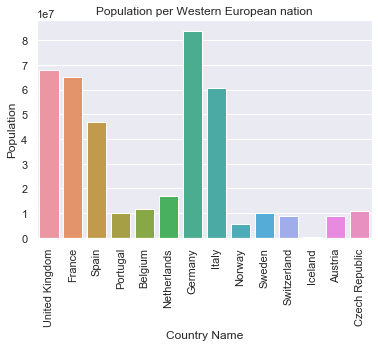

In [150]:
sns.barplot(x = western_europe.index, y = western_europe["Population"])
plt.xticks(rotation = 90)
plt.title("Population per Western European nation")

In [151]:
mergedpop.loc["Bosnia and Herzegovina"]

Population            3280819
Yearly Change (%)       -0.61
Net Change             -20181
Density (P/Km²)            64
Land Area (Km²)         51000
Net Migrants           -21585
Refugees per 1000        1.78
Refugees in (2016)       5271
Refugees in (2015)       6805
Refugees in (2014)       6890
Refugees in (2013)       6926
Refugees in (2012)       6903
Refugees in (2011)       6933
Refugees in (2010)       7016
Refugees in (2009)       7132
Refugees in (2008)       7257
Refugees in (2007)      7,367
Name: Bosnia and Herzegovina, dtype: object

In [152]:
eastern_europe = mergedpop.loc[["Estonia", "Latvia", "Lithuania", "Belarus", "Ukraine", "Romania", 
                               "Bosnia and Herzegovina", "Bulgaria", "Poland", "Slovakia", "Serbia", 
                               "Hungary", "North Macedonia", "Greece", "Albania"]]
print(eastern_europe)

                        Population  Yearly Change (%)  Net Change  \
Country Name                                                        
Estonia                    1326535               0.07         887   
Latvia                     1886198              -1.08      -20545   
Lithuania                  2722289              -1.35      -37338   
Belarus                    9449323              -0.03       -3088   
Ukraine                   43733762              -0.59     -259876   
Romania                   19237691              -0.66     -126866   
Bosnia and Herzegovina     3280819              -0.61      -20181   
Bulgaria                   6948445              -0.74      -51674   
Poland                    37846611              -0.11      -41157   
Slovakia                   5459642               0.05        2629   
Serbia                     8737371              -0.40      -34864   
Hungary                    9660351              -0.25      -24328   
North Macedonia            2083374

Text(0.5, 1.0, 'Refugees in 2016 per Eastern European nation')

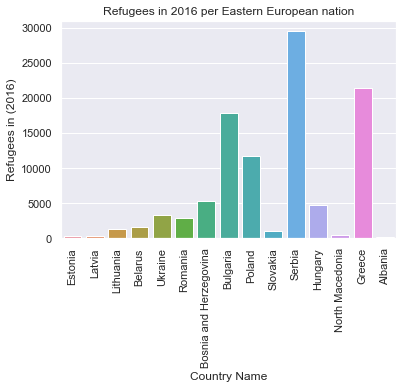

In [153]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Refugees in (2016)"])
plt.xticks(rotation = 90)
plt.title("Refugees in 2016 per Eastern European nation")

Text(0.5, 1.0, 'Refugees in 2008 per Eastern European nation')

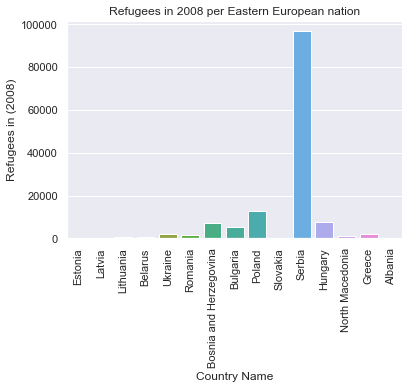

In [154]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Refugees in (2008)"])
plt.xticks(rotation = 90)
plt.title("Refugees in 2008 per Eastern European nation")

Text(0.5, 1.0, 'Population per Western European nation')

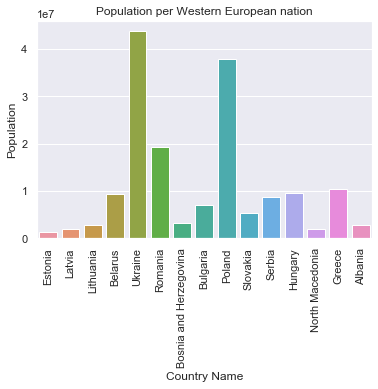

In [155]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Population"])
plt.xticks(rotation = 90)
plt.title("Population per Western European nation")

In [156]:
frames = [western_europe, eastern_europe]
europe = pd.concat(frames, axis = 0, join = "outer")
print(europe)

                        Population  Yearly Change (%)  Net Change  \
Country Name                                                        
United Kingdom            67886011               0.53      355839   
France                    65273511               0.22      143783   
Spain                     46754778               0.04       18002   
Portugal                  10196709              -0.29      -29478   
Belgium                   11589623               0.44       50295   
Netherlands               17134872               0.22       37742   
Germany                   83783942               0.32      266897   
Italy                     60461826              -0.15      -88249   
Norway                     5421241               0.79       42384   
Sweden                    10099265               0.63       62886   
Switzerland                8654622               0.74       63257   
Iceland                     341243               0.65        2212   
Austria                    9006398

Text(0.5, 1.0, 'Rufugee comparison between Eastern Europe and Western Europe')

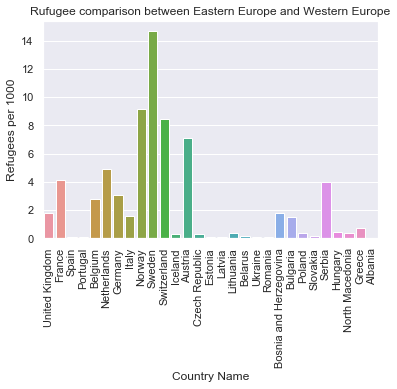

In [157]:
sns.barplot(x = europe.index, y = europe["Refugees per 1000"])
plt.xticks(rotation = 90)
plt.title("Rufugee comparison between Eastern Europe and Western Europe")

In [158]:
mergedpop.to_csv(r"C:\Users\georg\DataPython\refugee_mergedpop.csv", index = True, header = True)